* 설치

In [6]:
%%capture --no-stderr
%pip install python-dotenv langchain langchain-openai

* 실행

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")

In [4]:
# llm 다이렉트로 호출
result = llm.invoke("2 # 3 값은 몇이야?")
print(result)

APIConnectionError: Connection error.

/home/lisyoen/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lisyoen/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lisyoen/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lisyoen/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lisyoen/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from 

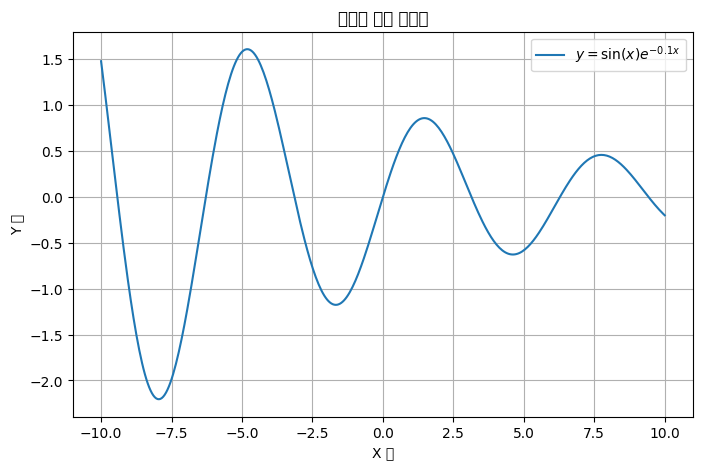

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
x = np.linspace(-10, 10, 400)
y = np.sin(x) * np.exp(-0.1 * x)

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$y = \sin(x) e^{-0.1x}$')
plt.xlabel("X 값")
plt.ylabel("Y 값")
plt.title("임의의 함수 그래프")
plt.legend()
plt.grid()

# 그래프 출력
plt.show()


In [5]:
from langchain_core.tools import tool
from pprint import pprint

@tool
def operator_sharp(a: int, b: int) -> int:
    """calcurate a # b.

    Args:
        a: first int
        b: second int
    """
    #print(f"call by llm operator # ({a}, {b})")
    return a * b

#result = operator_charp({"a":10, "b":20})
#print(result)

llm_with_tools = llm.bind_tools([operator_sharp])
result = llm_with_tools.invoke("2 # 3 값은 몇이야?")
#print(result)
pprint(result.additional_kwargs)

{'refusal': None,
 'tool_calls': [{'function': {'arguments': '{"a":2,"b":3}',
                              'name': 'operator_sharp'},
                 'id': 'call_t41dWQT6J4bFD04KnMILTdaf',
                 'type': 'function'}]}


In [6]:
# chain으로 호출
from operator import attrgetter
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("user", "{input}")
])

chain = prompt | llm_with_tools | attrgetter("tool_calls") | operator_sharp.map()
result = chain.invoke("2 # 3하면 몇이야?")
print(result)


[ToolMessage(content='6', name='operator_sharp', tool_call_id='call_SQnyypvG75MYwS8KGSoaH5n9')]
